Every year many students give the GRE exam to get admission in foreign Universities. The data set contains GRE Scores (out of 340), TOEFL Scores (out of 120), University Rating (out of 5), Statement of Purpose strength (out of 5), Letter of Recommendation strength (out of 5), Undergraduate GPA (out of 10), Research Experience (0=no, 1=yes), Admitted (0=no, 1=yes). Admitted is the target variable.

DataSet: https://www.kaggle.com/mohansacharya/graduate-admissions

The counselor of the firm is supposed check whether the student will get an admission or not based on his/her GRE score and Academic Score. So to help the counselor to take appropriate decisions build a machine learning model classifier using Decision tree to predict whether a student will get admission or not.

a) Apply Data pre-processing (Label Encoding, Data Transformation....) techniques if necessary.

b) Perform data-preparation (Train-Test Split)

c) Apply Machine Learning Algorithm

d) Evaluate Model.

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split

In [30]:
data = pd.read_csv("Admission_Predict.csv")

In [31]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [33]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [34]:
data.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [35]:
data.columns = [c.replace(' ', '') for c in data.columns]

In [36]:
data.loc[data['ChanceofAdmit'] < 0.8, 'ChanceofAdmit'] = 0
data.loc[data['ChanceofAdmit'] >= 0.8, 'ChanceofAdmit'] = 1

In [37]:
(data==0).sum()

SerialNo.             0
GREScore              0
TOEFLScore            0
UniversityRating      0
SOP                   0
LOR                   0
CGPA                  0
Research            181
ChanceofAdmit       272
dtype: int64

In [38]:
X = data.drop(['ChanceofAdmit','SerialNo.'],axis=1)
y = data['ChanceofAdmit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [39]:
model = DecisionTreeClassifier()
model = model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [40]:
print("Confusion matrix:\n")
print(metrics.confusion_matrix(y_test, y_pred))

Confusion matrix:

[[64  6]
 [ 3 27]]


In [41]:
print("1. Accuracy Score:", metrics.accuracy_score(y_test, y_pred))
print("2. Precision Score:",metrics.precision_score(y_test, y_pred))
print("3. Recall Score:", metrics.recall_score(y_test, y_pred))
print("4. f1 Score:", metrics.f1_score(y_test, y_pred))

1. Accuracy Score: 0.91
2. Precision Score: 0.8181818181818182
3. Recall Score: 0.9
4. f1 Score: 0.8571428571428571


In [42]:
y_test

331    0.0
329    0.0
352    0.0
372    1.0
198    0.0
      ... 
99     0.0
139    0.0
124    0.0
334    0.0
237    1.0
Name: ChanceofAdmit, Length: 100, dtype: float64

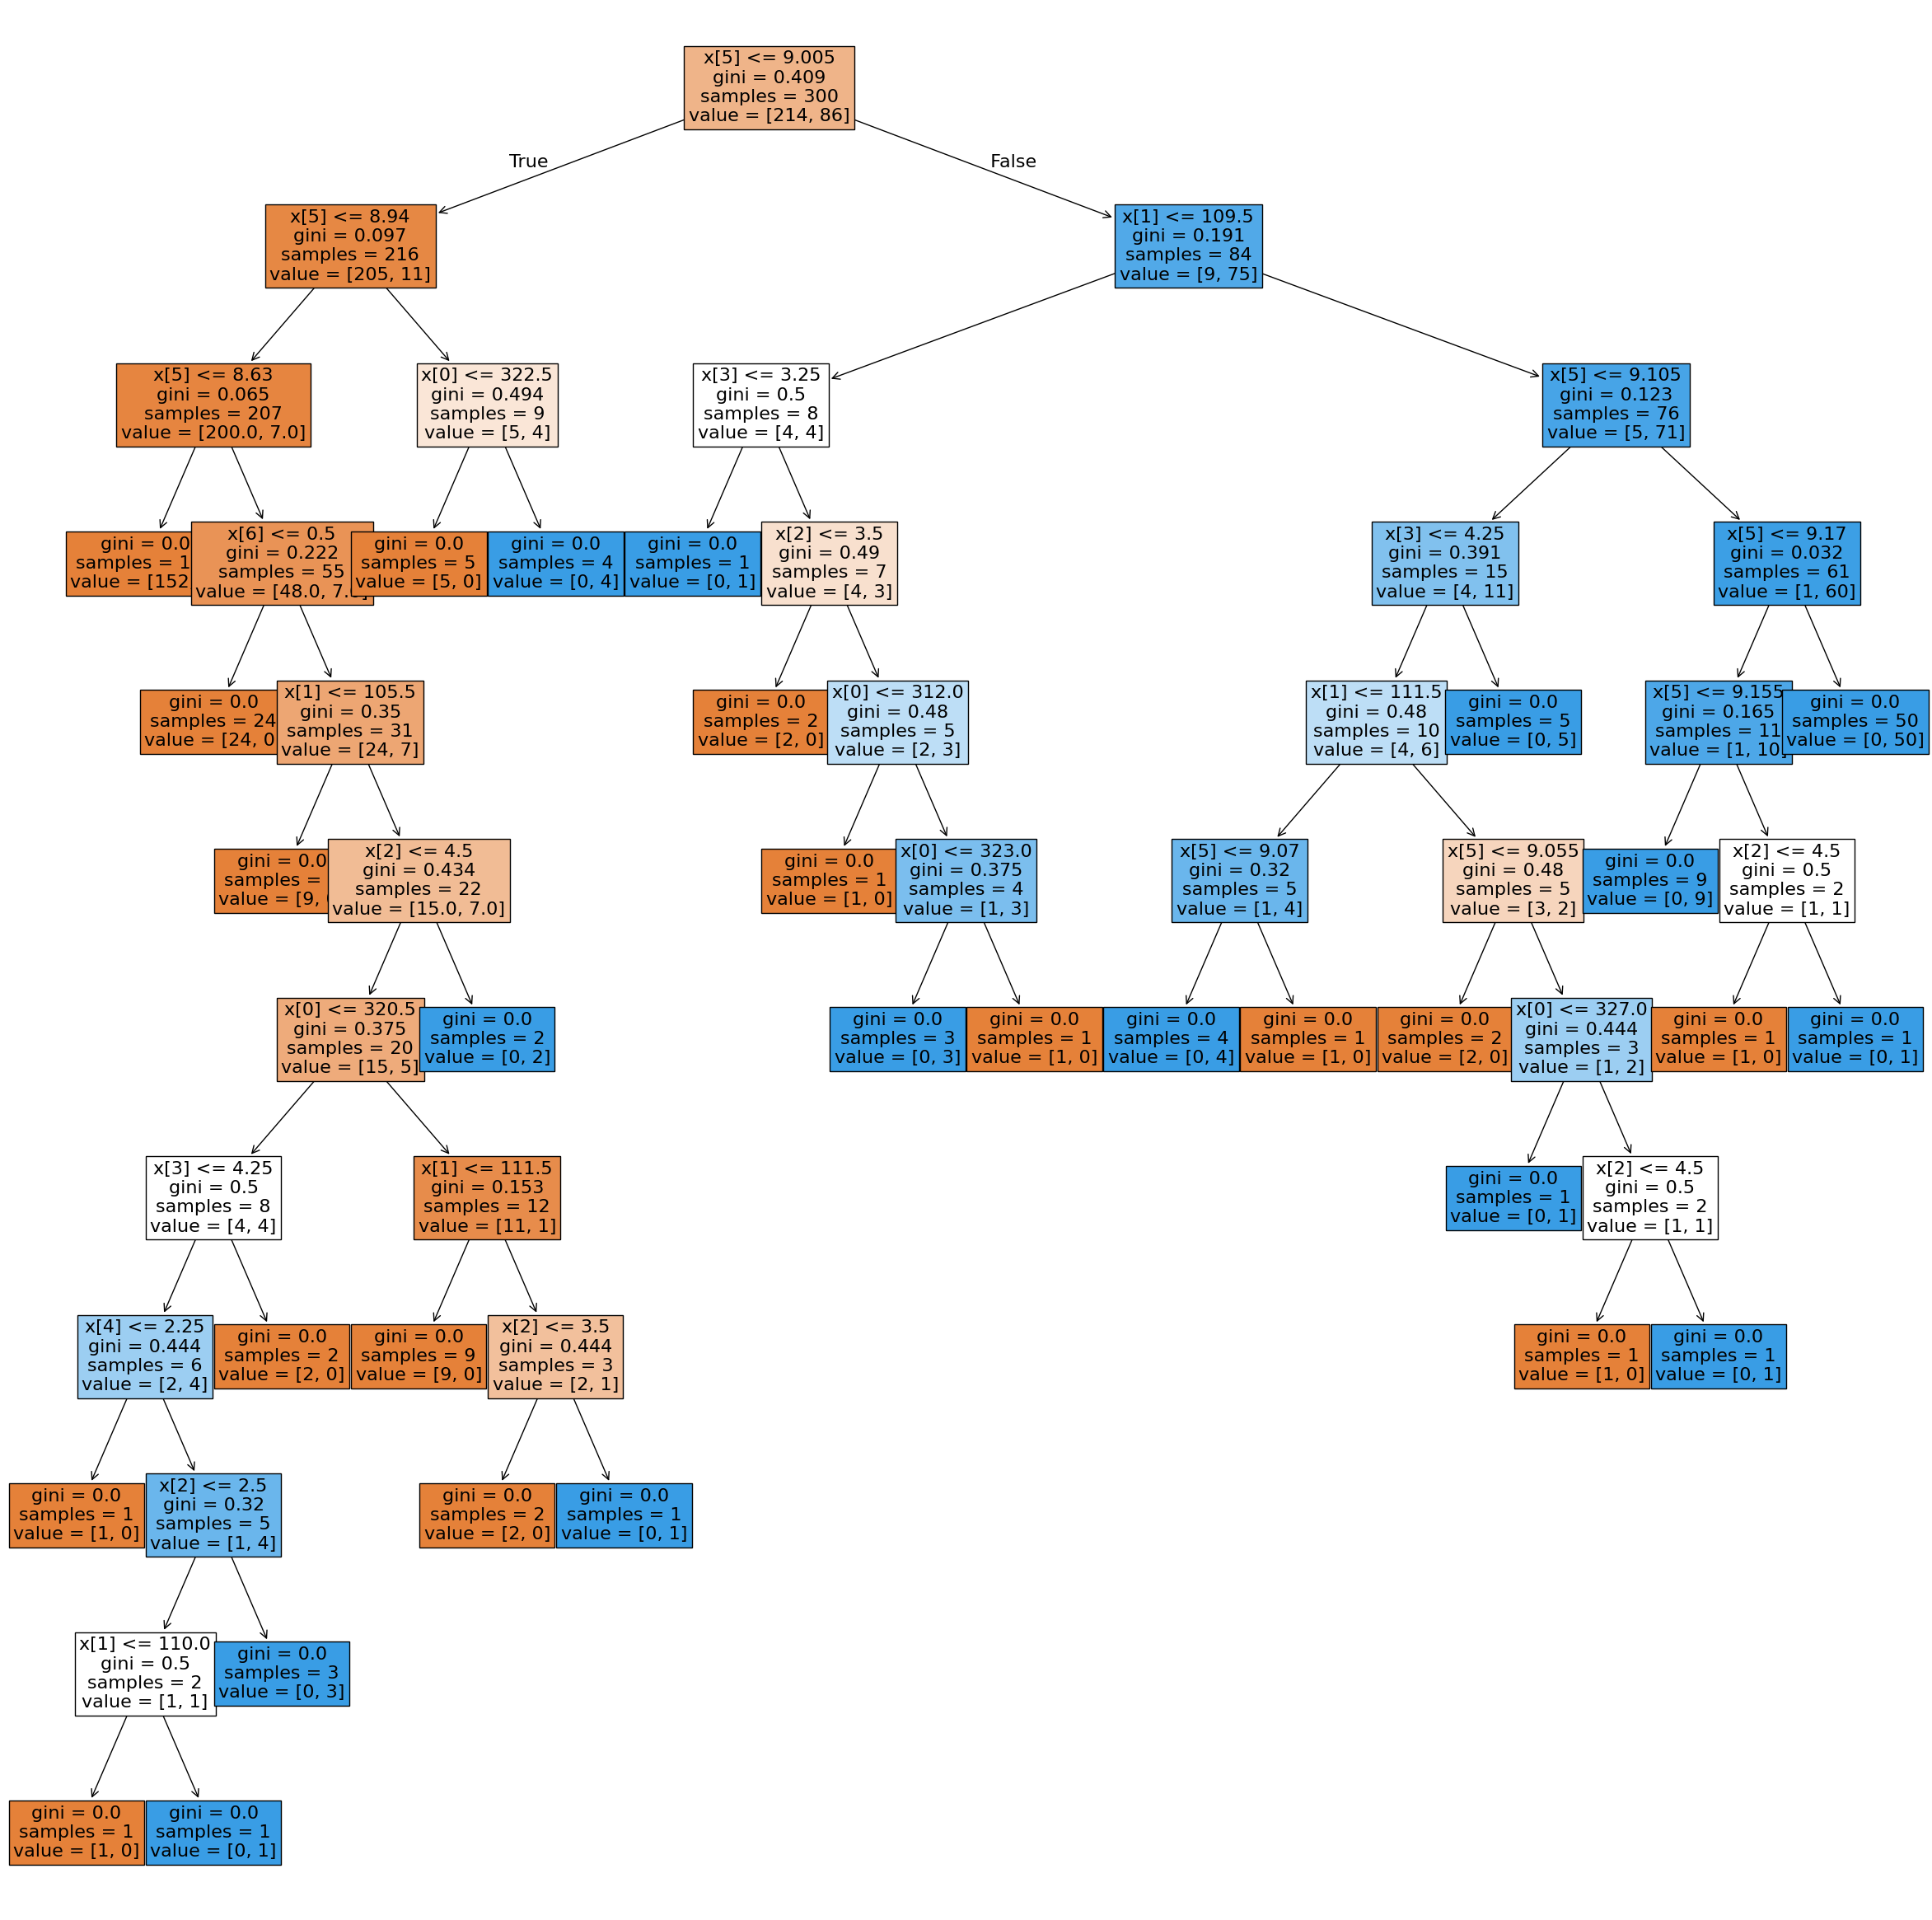

In [43]:
from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize=(30,30))
tree.plot_tree(clf, filled=True, fontsize=16)
plt.show()


In [44]:
clf.score(X_test,y_test)

0.97

In [45]:

print("Missing values in each column:")
print(data.isnull().sum())

Missing values in each column:
SerialNo.           0
GREScore            0
TOEFLScore          0
UniversityRating    0
SOP                 0
LOR                 0
CGPA                0
Research            0
ChanceofAdmit       0
dtype: int64


In [ ]:


importances = model.feature_importances_
feature_names = data.drop(columns='Chance of Admit ').columns  # assuming 'Chance of Admit ' is the target
plt.figure(figsize=(10,6))
plt.barh(feature_names, importances)
plt.xlabel("Feature Importance")
plt.title("Decision Tree Feature Importance")
plt.show()

In [47]:

from sklearn.metrics import classification_report
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.91      0.93        70
         1.0       0.82      0.90      0.86        30

    accuracy                           0.91       100
   macro avg       0.89      0.91      0.90       100
weighted avg       0.91      0.91      0.91       100



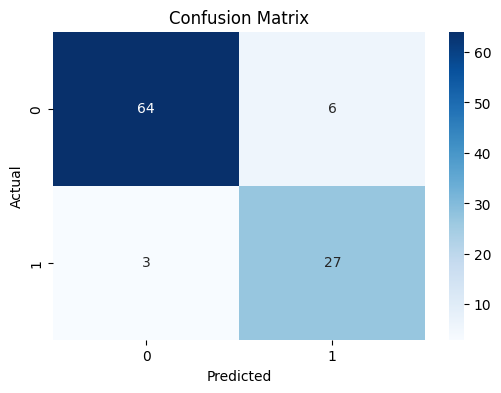

In [48]:
# ✅ Confusion Matrix Heatmap
import seaborn as sns
cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

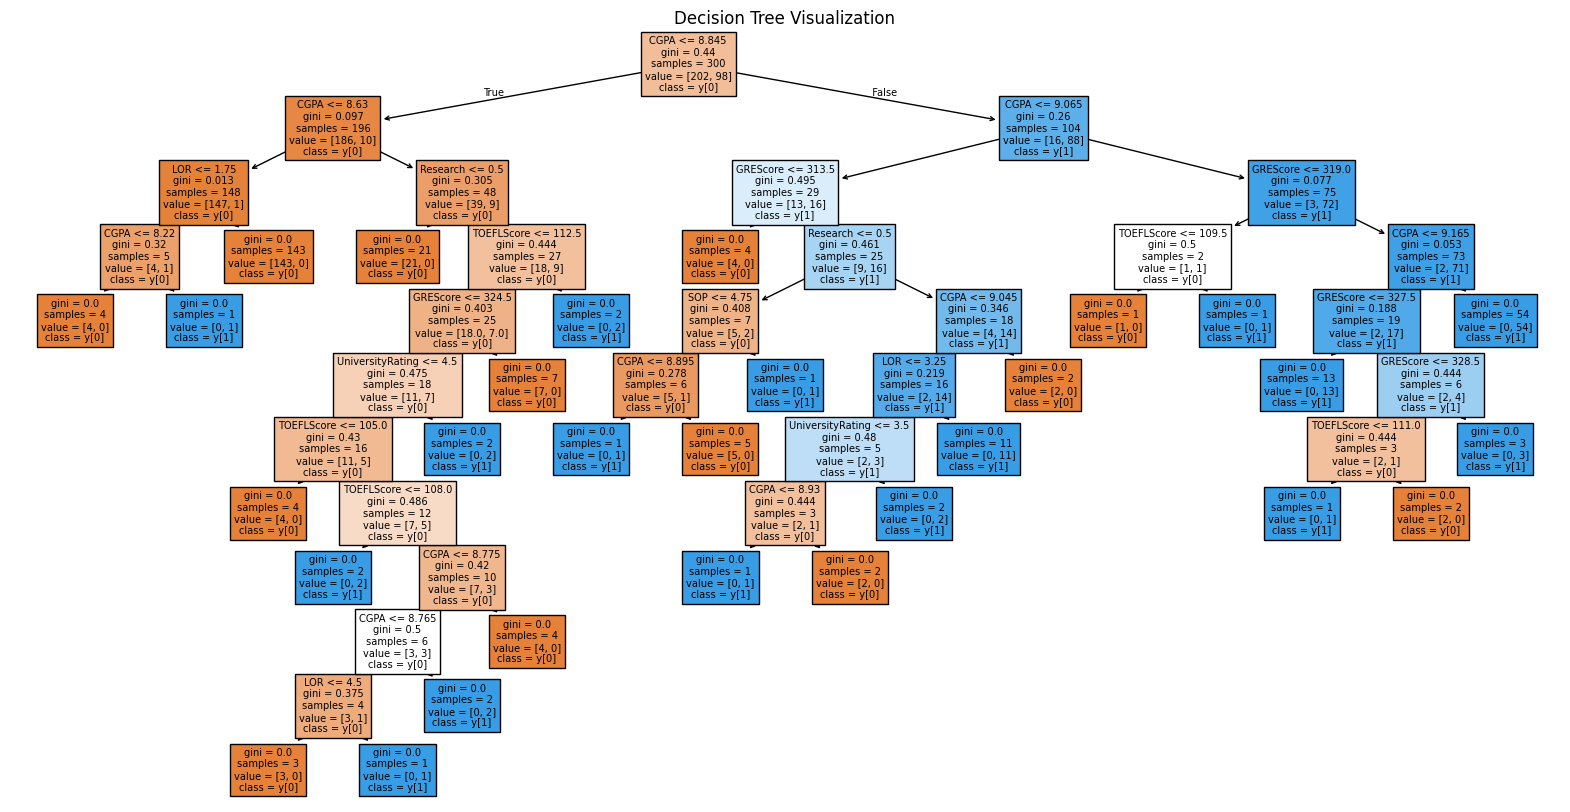

In [49]:
# ✅ Enhanced Decision Tree Visualization
plt.figure(figsize=(20,10))
plot_tree(model, feature_names=X.columns, class_names=True, filled=True)
plt.title("Decision Tree Visualization")
plt.show()

In [50]:

print("The Decision Tree Classifier was trained on the admission prediction dataset.")
print("We checked for missing values, visualized feature importance, evaluated the model using various metrics, and enhanced the tree visualization.")

The Decision Tree Classifier was trained on the admission prediction dataset.
We checked for missing values, visualized feature importance, evaluated the model using various metrics, and enhanced the tree visualization.
